In [2]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
np.random.seed(42)
sys.path.append(os.path.abspath('../../src/Bayesian_Data_Analysis-Andrew_Gelman'))
from import_data import DataImporter

# Chapter 1: Probability and inference

## 1.1 The three steps of Bayesian data analysis

<p>This book is concerned with practical methods for making inferences from data using probability models for quantities we observe and for quantities about which we wish to learn. The essential characteristic of Bayesian methods is their explicit use of probability for quantifying uncertainty in inferences based on statistical data analysis.</p>
<p>The process of Bayesian data analysis can be idealized by dividing it into the following three steps:</p>

1. Setting up a full probability model—a joint probability distribution for all observable and unobservable quantities in a problem. The model should be consistent with knowledge about the underlying scientific problem and the data collection process.

2. Conditioning on observed data: calculating and interpreting the appropriate posterior distribution—the conditional probability distribution of the unobserved quantities of ultimate interest, given the observed data.

3. Evaluating the fit of the model and the implications of the resulting posterior distribution: how well does the model fit the data, are the substantive conclusions reasonable, and how sensitive are the results to the modeling assumptions in step 1? In response, one can alter or expand the model and repeat the three steps.

<p>Great advances in all these areas have been made in the last forty years, and many of these are reviewed and used in examples throughout the book. Our treatment covers all three steps, the second involving computational methodology and the third a delicate balance of technique and judgment, guided by the applied context of the problem. The first step remains a major stumbling block for much Bayesian analysis: just where do our models come from? How do we go about constructing appropriate probability specifications? We provide some guidance on these issues and illustrate the importance of the third step in retrospectively evaluating the fit of models. Along with the improved techniques available for computing conditional probability distributions in the second step, advances in carrying out the third step alleviate to some degree the need to assume correct model specification at the first attempt. In particular, the much-feared dependence of conclusions on 'subjective' prior distributions can be examined and explored.</p>

<p>A primary motivation for Bayesian thinking is that it facilitates a common-sense interpretation of statistical conclusions. For instance, a Bayesian (probability) interval for an unknown quantity of interest can be directly regarded as having a high probability of containing the unknown quantity, in contrast to a frequentist (confidence) interval, which may strictly be interpreted only in relation to a sequence of similar inferences that might be made in repeated practice. Recently in applied statistics, increased emphasis has been placed on interval estimation rather than hypothesis testing, and this provides a strong impetus to the Bayesian viewpoint, since it seems likely that most users of standard confidence intervals give them a common-sense Bayesian interpretation. One of our aims in this book is to indicate the extent to which Bayesian interpretations of common simple statistical procedures are justified.</p>

<p>Rather than argue the foundations of statistics—see the bibliographic note at the end of this chapter for references to foundational debates—we prefer to concentrate on the pragmatic advantages of the Bayesian framework, whose flexibility and generality allow it to cope with complex problems. The central feature of Bayesian inference, the direct quantification of uncertainty, means that there is no impediment in principle to fitting models with many parameters and complicated multilayered probability specifications. In practice, the problems are ones of setting up and computing with such large models, and a large part of this book focuses on recently developed and still developing techniques for handling these modeling and computational challenges. The freedom to set up complex models arises in large part from the fact that the Bayesian paradigm provides a conceptually simple method for coping with multiple parameters, as we discuss in detail from Chapter 3 on.</p>

## 1.2 General notation for statistical inference

<p>Statistical inference is concerned with drawing conclusions, from numerical data, about quantities that are not observed. For example, a clinical trial of a new cancer drug might be designed to compare the five-year survival probability in a population given the new drug to that in a population under standard treatment. These survival probabilities refer to a large population of patients, and it is neither feasible nor ethically acceptable to experiment on an entire population. Therefore inferences about the true probabilities and, in particular, their differences must be based on a sample of patients. In this example, even if it were possible to expose the entire population to one or the other treatment, it is never possible to expose anyone to both treatments, and therefore statistical inference would still be needed to assess the causal inference—the comparison between the observed outcome in each patient and that patient's unobserved outcome if exposed to the other treatment.</p>
<p>We distinguish between two kinds of estimands—unobserved quantities for which statistical inferences are made—first, potentially observable quantities, such as future observations of a process, or the outcome under the treatment not received in the clinical trial example; and second, quantities that are not directly observable, that is, parameters that govern the hypothetical process leading to the observed data (for example, regression coefficients). The distinction between these two kinds of estimands is not always precise, but is generally useful as a way of understanding how a statistical model for a particular problem fits into the real world.</p>

### Parameters, data, and predictions

As general notation, we let θ denote unobservable vector quantities or population parameters of interest (such as the probabilities of survival under each treatment for randomly chosen members of the population in the example of the clinical trial), y denote the observed data (such as the numbers of survivors and deaths in each treatment group), and ˜y denote unknown, but potentially observable, quantities (such as the outcomes of the patients under the other treatment, or the outcome under each of the treatments for a new patient similar to those already in the trial). In general these symbols represent multivariate quantities. We generally use Greek letters for parameters, lower case Roman letters for observed or observable scalars and vectors (and sometimes matrices), and upper case Roman letters for observed or observable matrices. When using matrix notation, we consider vectors as column vectors throughout; for example, if $u$ is a vector with n components, then uT u is a scalar and uuT an n × n matrix.

### Observational units and variables

In many statistical studies, data are gathered on each of a set of n objects or units, and we can write the data as a vector, y = (y1,...,yn). In the clinical trial example, we might label yi as 1 if patient i is alive after five years or 0 if the patient dies. If several variables are measured on each unit, then each yi is actually a vector, and the entire dataset y is a matrix (usually taken to have n rows). The y variables are called the 'outcomes' and are considered 'random' in the sense that, when making inferences, we wish to allow for the possibility that the observed values of the variables could have turned out otherwise, due to the sampling process and the natural variation of the population.

### Exchangeability

The usual starting point of a statistical analysis is the (often tacit) assumption that the n values yi may be regarded as exchangeable, meaning that we express uncertainty as a joint probability density p(y1,...,yn) that is invariant to permutations of the indexes. A nonexchangeable model would be appropriate if information relevant to the outcome were conveyed in the unit indexes rather than by explanatory variables (see below). The idea of exchangeability is fundamental to statistics, and we return to it repeatedly throughout the book.

We commonly model data from an exchangeable distribution as independently and identically distributed (iid) given some unknown parameter vector θ with distribution p(θ). In the clinical trial example, we might model the outcomes yi as iid, given θ, the unknown probability of survival.

### Explanatory variables

It is common to have observations on each unit that we do not bother to model as random. In the clinical trial example, such variables might include the age and previous health status of each patient in the study. We call this second class of variables explanatory variables, or covariates, and label them x. We use X to denote the entire set of explanatory variables for all n units; if there are k explanatory variables, then X is a matrix with n rows and k columns. Treating X as random, the notion of exchangeability can be extended to require the distribution of the n values of (x, y)i to be unchanged by arbitrary permutations of the indexes. It is always appropriate to assume an exchangeable model after incorporating sufficient relevant information in X that the indexes can be thought of as randomly assigned. It follows from the assumption of exchangeability that the distribution of y, given x, is the same for all units in the study in the sense that if two units have the same value of x, then their distributions of y are the same. Any of the explanatory variables x can be moved into the y category if we wish to model them. We discuss the role of explanatory variables (also called predictors) in detail in Chapter 8 in the context of analyzing surveys, experiments, and observational studies, and in the later parts of this book in the context of regression models.

### Hierarchical modeling

In Chapter 5 and subsequent chapters, we focus on hierarchical models (also called multilevel models), which are used when information is available on several different levels of observational units. In a hierarchical model, it is possible to speak of exchangeability at each level of units. For example, suppose two medical treatments are applied, in separate randomized experiments, to patients in several different cities. Then, if no other information were available, it would be reasonable to treat the patients within each city as exchangeable and also treat the results from different cities as themselves exchangeable. In practice it would make sense to include, as explanatory variables at the city level, whatever relevant information we have on each city, as well as the explanatory variables mentioned before at the individual level, and then the conditional distributions given these explanatory variables would be exchangeable.


## 1.3 Bayesian inference

Bayesian statistical conclusions about a parameter θ, or unobserved data ˜y, are made in terms of probability statements. These probability statements are conditional on the observed value of y, and in our notation are written simply as p(θ|y) or p(˜y|y). We also implicitly condition on the known values of any covariates, x. It is at the fundamental level of conditioning on observed data that Bayesian inference departs from the approach to statistical inference described in many textbooks, which is based on a retrospective evaluation of the procedure used to estimate θ (or ˜y) over the distribution of possible y values conditional on the true unknown value of θ. Despite this difference, it will be seen that in many simple analyses, superficially similar conclusions result from the two approaches to statistical inference. However, analyses obtained using Bayesian methods can be easily extended to more complex problems. In this section, we present the basic mathematics and notation of Bayesian inference, followed in the next section by an example from genetics.

### Probability notation

Some comments on notation are needed at this point. First, p(·|·) denotes a conditional probability density with the arguments determined by the context, and similarly for p(·), which denotes a marginal distribution. We use the terms 'distribution' and 'density' interchangeably. The same notation is used for continuous density functions and discrete probability mass functions. Different distributions in the same equation (or expression) will each be denoted by p(·), as in (1.1) below, for example. Although an abuse of standard mathematical notation, this method is compact and similar to the standard practice of using p(·) for the probability of any discrete event, where the sample space is also suppressed in the notation. Depending on context, to avoid confusion, we may use the notation Pr(·) for the probability of an event; for example, Pr(θ &gt; 2) = ! θ&gt;2 p(θ)dθ. When using a standard distribution, we use a notation based on the name of the distribution; for example, if θ has a normal distribution with mean µ and variance σ2, we write θ ∼ N(µ, σ2) or p(θ) = N(θ|µ, σ2) or, to be even more explicit, p(θ|µ, σ2) = N(θ|µ, σ2). Throughout, we use notation such as N(µ, σ2) for random variables and N(θ|µ, σ2) for density functions. Notation and formulas for several standard distributions appear in Appendix A.</

We also occasionally use the following expressions for random variables θ: the coefficient of variation is defined as sd(θ)/E(θ), the geometric mean is exp(E[log(θ)]), and the geometric standard deviation is exp(sd[log(θ)]).

### Bayes' rule

...


## 1.6 Example: probabilities from football point spreads

As an example of how probabilities might be assigned using empirical data and plausible substantive assumptions, we consider methods of estimating the probabilities of certain outcomes in professional (American) football games. This is an example only of probability assignment, not of Bayesian inference. A number of approaches to assigning probabilities for football game outcomes are illustrated: making subjective assessments, using empirical probabilities based on observed data, and constructing a parametric probability model.

In [3]:
data_importer = DataImporter('football')
df,description = data_importer.data, data_importer.data_description
print(description)
print(df.head())


        The football data contains information about the results of American football games 
        across multiple seasons. Each row represents a game and includes the following columns:
        
        - home: Indicates whether the favorite team played at home (1 for yes, 0 for no).
        - favorite: Score of the favorite team in the game.
        - underdog: Score of the underdog team in the game.
        - spread: Expected point difference (betting line) between the favorite and underdog.
        - favorite.name: Code for the team that is the favorite.
        - underdog.name: Code for the underdog team.
        - week: Week number in the season when the game was played.
        
        The analysis in Chapter 1 focuses on the data from the 1981, 1983, and 1984 seasons.

        Important notes:
            - Each season consists of 224 games, and data from different seasons are concatenated.
            - Chapter 1 analysis focuses on data from the 1981, 1983, and 1984 seaso

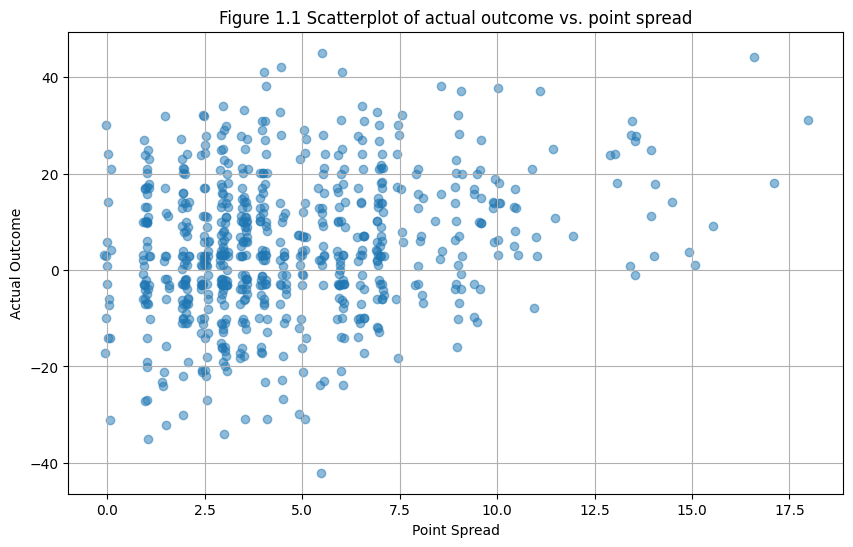

In [4]:
# Scatterplot of actual outcome vs. point spread
x = df['spread']
y = df['favorite'] - df['underdog']

# Add jitter
x_jittered = x + np.random.uniform(-0.1, 0.1, size=len(x))
y_jittered = y + np.random.uniform(-0.2, 0.2, size=len(y))

plt.figure(figsize=(10, 6))
plt.scatter(x_jittered, y_jittered, alpha=0.5)
plt.xlabel('Point Spread')
plt.ylabel('Actual Outcome')
plt.title('Figure 1.1 Scatterplot of actual outcome vs. point spread')
plt.grid(True)
plt.show()
# Descripción de la figura
description = """
<p>Figure 1.1 Scatterplot of actual outcome vs. point spread for each of 672 professional football games. The x and y coordinates are jittered by adding uniform random numbers to each point's coordinates (between -0.1 and 0.1 for the x coordinate; between -0.2 and 0.2 for the y coordinate) in order to display multiple values but preserve the discrete-valued nature of each.</p>
"""
display(HTML(description))


<p>Football experts provide a point spread for every football game as a measure of the difference in ability between the two teams. For example, team A might be a 3.5-point favorite to defeat team B. The implication of this point spread is that the proposition that team A, the favorite, defeats team B, the underdog, by 4 or more points is considered a fair bet; in other words, the probability that A wins by more than 3.5 points is 1 2 . If the point spread is an integer, then the implication is that team A is as likely to win by more points than the point spread as it is to win by fewer points than the point spread (or to lose); there is positive probability that A will win by exactly the point spread, in which case neither side is paid off. The assignment of point spreads is itself an interesting exercise in probabilistic reasoning; one interpretation is that the point spread is the median of the distribution of the gambling population's beliefs about the possible outcomes of the game. For the rest of this example, we treat point spreads as given and do not worry about how they were derived.</p>

<p>The point spread and actual game outcome for 672 professional football games played during the 1981, 1983, and 1984 seasons are graphed in Figure 1.1. (Much of the 1982 season was canceled due to a labor dispute.) Each point in the scatterplot displays the point spread, x, and the actual outcome (favorite's score minus underdog's score), y. (In games with a point spread of zero, the labels 'favorite' and 'underdog' were assigned at random.) A small random jitter is added to the x and y coordinate of each point on the graph so that multiple points do not fall exactly on top of each other.</p>

### Assigning probabilities based on observed frequencies

<p>It is of interest to assign probabilities to particular events: Pr(favorite wins), Pr(favorite wins | point spread is 3.5 points), Pr(favorite wins by more than the point spread), Pr(favorite wins by more than the point spread | point spread is 3.5 points), and so forth. We might report a subjective probability based on informal experience gathered by reading the newspaper and watching football games. The probability that the favored team wins a game should certainly be greater than 0.5, perhaps between 0.6 and 0.75? More complex events require more intuition or knowledge on our part. A more systematic approach is to assign probabilities based on the data in Figure 1.1. Counting a tied game as one-half win and</p>


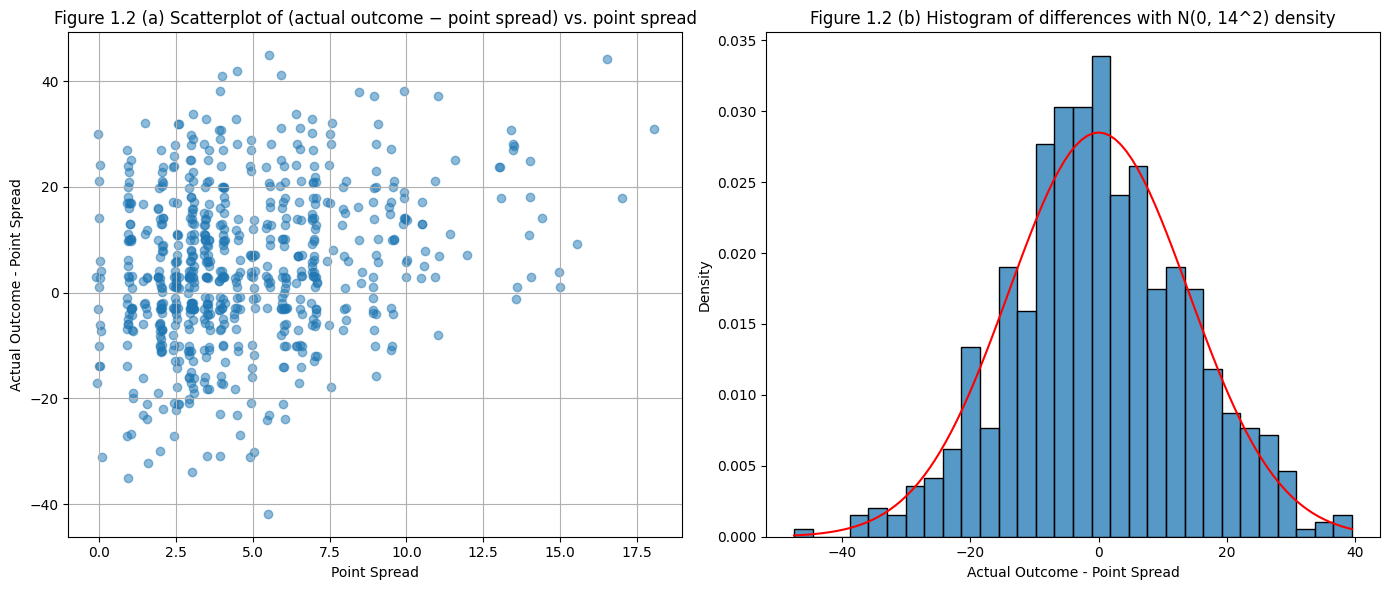

In [ ]:
import seaborn as sns
x = df['spread']
y = df['favorite'] - df['underdog']

# Añadir jitter
x_jittered = x + np.random.uniform(-0.1, 0.1, size=len(x))
y_jittered = y + np.random.uniform(-0.2, 0.2, size=len(y))

# Diferencias para el histograma
differences = y - x

# Crear la figura y los subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatterplot
axes[0].scatter(x_jittered, y_jittered, alpha=0.5)
axes[0].set_xlabel('Point Spread')
axes[0].set_ylabel('Actual Outcome - Point Spread')
axes[0].set_title('Figure 1.2 (a) Scatterplot of (actual outcome − point spread) vs. point spread')
axes[0].grid(True)

# Histograma con la distribución normal superpuesta
sns.histplot(differences, kde=False, ax=axes[1], stat="density", bins=30)
x_vals = np.linspace(min(differences), max(differences), 100)
y_vals = (1 / (14 * np.sqrt(2 * np.pi))) * np.exp(-0.5 * (x_vals / 14) ** 2)
axes[1].plot(x_vals, y_vals, color='red')
axes[1].set_xlabel('Actual Outcome - Point Spread')
axes[1].set_ylabel('Density')
axes[1].set_title('Figure 1.2 (b) Histogram of differences with N(0, 14^2) density')

plt.tight_layout()
plt.show()

# Descripción de la figura
description = """
<p>Figure 1.2 (a) Scatterplot of (actual outcome − point spread) vs. point spread for each of 672 professional football games (with uniform random jitter added to x and y coordinates).</p>
<p>Figure 1.2 (b) Histogram of the differences between the game outcome and the point spread, with the N(0, 14^2) density superimposed.</p>
"""
display(HTML(description))

<p>Figure 1.2 (a) Scatterplot of (actual outcome − point spread) vs. point spread for each of 672 professional football games (with uniform random jitter added to x and y coordinates). (b) Histogram of the differences between the game outcome and the point spread, with the N(0, 142) density superimposed.</p>
<p>one-half loss, and ignoring games for which the point spread is zero (and thus there is no favorite), we obtain empirical estimates such as:</p>
<ul>
<li>Pr(favorite wins) = 410.5 655 = 0.63</li>
<li>Pr(favorite wins | x = 3.5) = 36 59 = 0.61</li>
<li>Pr(favorite wins by more than the point spread) = 308 655 = 0.47</li>
<li>Pr(favorite wins by more than the point spread | x = 3.5) = 32 59 = 0.54.</li>
</ul>
<p>These empirical probability assignments all seem sensible in that they match the intuition of knowledgeable football fans. However, such probability assignments are problematic for events with few directly relevant data points. For example, 8.5-point favorites won five out of five times during this three-year period, whereas 9-point favorites won thirteen out of twenty times. However, we realistically expect the probability of winning to be greater for a 9-point favorite than for an 8.5-point favorite. The small sample size with point spread 8.5 leads to imprecise probability assignments. We consider an alternative method using a parametric model.</p>
<div data-testid="stHeadingWithActionElements" class="st-emotion-cache-1lvxfs7 e121c1cl2"><h1 level="1" id="a-parametric-model-for-the-difference-between-outcome-and-point-spread">A parametric model for the difference between outcome and point spread<span data-testid="stHeaderActionElements" class="st-emotion-cache-gi0tri e121c1cl3"><a href="#a-parametric-model-for-the-difference-between-outcome-and-point-spread" class="st-emotion-cache-yinll1 e121c1cl1"><svg xmlns="http://www.w3.org/2000/svg" width="1rem" height="1rem" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M15 7h3a5 5 0 0 1 5 5 5 5 0 0 1-5 5h-3m-6 0H6a5 5 0 0 1-5-5 5 5 0 0 1 5-5h3"></path><line x1="8" y1="12" x2="16" y2="12"></line></svg></a></span></h1></div>
<p>Figure 1.2a displays the differences y−x between the observed game outcome and the point spread, plotted versus the point spread, for the games in the football dataset. (Once again, random jitter was added to both coordinates.) This plot suggests that it may be roughly reasonable to model the distribution of y − x as independent of x. (See Exercise 6.10.) Figure 1.2b is a histogram of the differences y − x for all the football games, with a fitted normal density superimposed. This plot suggests that it may be reasonable to approximate the marginal distribution of the random variable d = y − x by a normal distribution. The sample mean of the 672 values of d is 0.07, and the sample standard deviation is 13.86, suggesting that the results of football games are approximately normal with mean equal to the point spread and standard deviation nearly 14 points (two converted touchdowns). For the remainder of the discussion we take the distribution of d to be independent of x and normal with mean zero and standard deviation 14 for each x; that is,</p>
<p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>d</mi><mi mathvariant="normal">∣</mi><mi>x</mi><mo>∼</mo><mi mathvariant="normal">N</mi><mo stretchy="false">(</mo><mn>0</mn><mo separator="true">,</mo><mn>1</mn><msup><mn>4</mn><mn>2</mn></msup><mo stretchy="false">)</mo><mo separator="true">,</mo></mrow><annotation encoding="application/x-tex">d|x\sim\mathrm{N}(0,14^{2}),</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal">d</span><span class="mord">∣</span><span class="mord mathnormal">x</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">∼</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1.0641em; vertical-align: -0.25em;"></span><span class="mord mathrm">N</span><span class="mopen">(</span><span class="mord">0</span><span class="mpunct">,</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">1</span><span class="mord"><span class="mord">4</span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.8141em;"><span style="top: -3.063em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span></span><span class="mclose">)</span><span class="mpunct">,</span></span></span></span></span></p>
<p>as displayed in Figure 1.2b. The assigned probability model is not perfect: it does not fit the data exactly, and, as is often the case with real data, neither football scores nor point spreads are continuous-valued quantities.</p>
<p>This electronic edition is for non-commercial purposes only.</p>
<p>16 1. PROBABILITY AND INFERENCE</p>
<div data-testid="stHeadingWithActionElements" class="st-emotion-cache-1lvxfs7 e121c1cl2"><h1 level="1" id="assigning-probabilities-using-the-parametric-model">Assigning probabilities using the parametric model<span data-testid="stHeaderActionElements" class="st-emotion-cache-gi0tri e121c1cl3"><a href="#assigning-probabilities-using-the-parametric-model" class="st-emotion-cache-yinll1 e121c1cl1"><svg xmlns="http://www.w3.org/2000/svg" width="1rem" height="1rem" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M15 7h3a5 5 0 0 1 5 5 5 5 0 0 1-5 5h-3m-6 0H6a5 5 0 0 1-5-5 5 5 0 0 1 5-5h3"></path><line x1="8" y1="12" x2="16" y2="12"></line></svg></a></span></h1></div>
<p>Nevertheless, the model provides a convenient approximation that can be used to assign probabilities to events. If d has a normal distribution with mean zero and is independent of the point spread, then the probability that the favorite wins by more than the point spread is 1 2 , conditional on any value of the point spread, and therefore unconditionally as well. Denoting probabilities obtained by the normal model as Prnorm, the probability that an x-point favorite wins the game can be computed, assuming the normal model, as follows:</p>
<p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mrow><mi mathvariant="normal">Pr</mi><mo>⁡</mo></mrow><mrow><mi mathvariant="normal">n</mi><mi mathvariant="normal">o</mi><mi mathvariant="normal">r</mi><mi mathvariant="normal">m</mi></mrow></msub><mo stretchy="false">(</mo><mi>y</mi><mo lspace="0em" rspace="0em">&gt;</mo><mn>0</mn><mtext> </mtext><mi mathvariant="normal">∣</mi><mtext> </mtext><mi>x</mi><mo stretchy="false">)</mo><mo>=</mo><msub><mrow><mi mathvariant="normal">Pr</mi><mo>⁡</mo></mrow><mrow><mi mathvariant="normal">n</mi><mi mathvariant="normal">o</mi><mi mathvariant="normal">r</mi><mi mathvariant="normal">m</mi></mrow></msub><mo stretchy="false">(</mo><mi>d</mi><mo lspace="0em" rspace="0em">&gt;</mo><mo>−</mo><mi>x</mi><mtext> </mtext><mi mathvariant="normal">∣</mi><mtext> </mtext><mi>x</mi><mo stretchy="false">)</mo><mo>=</mo><mn>1</mn><mo>−</mo><mi mathvariant="normal">Φ</mi><mrow><mo fence="true">(</mo><mo>−</mo><mfrac><mi>x</mi><mn>14</mn></mfrac><mo fence="true">)</mo></mrow><mo separator="true">,</mo></mrow><annotation encoding="application/x-tex">\operatorname*{Pr}_{\mathrm{norm}}(y{&gt;}0\,|\,x)=\operatorname*{Pr}_{\mathrm{norm}}(d{&gt;}-x\,|\,x)=1-\Phi\left(-{\frac{x}{14}}\right),</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop"><span class="mop"><span class="mord mathrm">Pr</span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathrm mtight">norm</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.03588em;">y</span><span class="mord"><span class="mrel">&gt;</span></span><span class="mord">0</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">∣</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal">x</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop"><span class="mop"><span class="mord mathrm">Pr</span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.1514em;"><span style="top: -2.55em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight"><span class="mord mathrm mtight">norm</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mopen">(</span><span class="mord mathnormal">d</span><span class="mord"><span class="mrel">&gt;</span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal">x</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord">∣</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal">x</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 0.7278em; vertical-align: -0.0833em;"></span><span class="mord">1</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1.2em; vertical-align: -0.35em;"></span><span class="mord">Φ</span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="minner"><span class="mopen delimcenter" style="top: 0em;"><span class="delimsizing size1">(</span></span><span class="mord">−</span><span class="mord"><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.6954em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">14</span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.394em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight">x</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.345em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span></span><span class="mclose delimcenter" style="top: 0em;"><span class="delimsizing size1">)</span></span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mpunct">,</span></span></span></span></span></p>
<p>where Φ is the standard normal cumulative distribution function. For example,</p>
<ul>
<li>Prnorm(favorite wins | x = 3.5) = 0.60</li>
<li>Prnorm(favorite wins | x = 8.5) = 0.73</li>
<li>Prnorm(favorite wins | x = 9.0) = 0.74.</li>
</ul>
<p>The probability for a 3.5-point favorite agrees with the empirical value given earlier, whereas the probabilities for 8.5- and 9-point favorites make more intuitive sense than the empirical values based on small samples.</p>
<div data-testid="stHeadingWithActionElements" class="st-emotion-cache-1lvxfs7 e121c1cl2"><h1 level="1" id="1-7-example-calibration-for-record-linkage">1.7 Example: calibration for record linkage<span data-testid="stHeaderActionElements" class="st-emotion-cache-gi0tri e121c1cl3"><a href="#1-7-example-calibration-for-record-linkage" class="st-emotion-cache-yinll1 e121c1cl1"><svg xmlns="http://www.w3.org/2000/svg" width="1rem" height="1rem" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M15 7h3a5 5 0 0 1 5 5 5 5 0 0 1-5 5h-3m-6 0H6a5 5 0 0 1-5-5 5 5 0 0 1 5-5h3"></path><line x1="8" y1="12" x2="16" y2="12"></line></svg></a></span></h1></div>
<p>We emphasize the essentially empirical (not 'subjective' or 'personal') nature of probabilities with another example in which they are estimated from data.</p>
<p>Record linkage refers to the use of an algorithmic technique to identify records from different databases that correspond to the same individual. Record-linkage techniques are used in a variety of settings. The work described here was formulated and first applied in the context of record linkage between the U.S. Census and a large-scale post-enumeration survey, which is the first step of an extensive matching operation conducted to evaluate census coverage for subgroups of the population. The goal of this first step is to declare as many records as possible 'matched' by computer without an excessive rate of error, thereby avoiding the cost of the resulting manual processing for all records not declared 'matched.'</p>
<div data-testid="stHeadingWithActionElements" class="st-emotion-cache-1lvxfs7 e121c1cl2"><h1 level="1" id="existing-methods-for-assigning-scores-to-potential-matches">Existing methods for assigning scores to potential matches<span data-testid="stHeaderActionElements" class="st-emotion-cache-gi0tri e121c1cl3"><a href="#existing-methods-for-assigning-scores-to-potential-matches" class="st-emotion-cache-yinll1 e121c1cl1"><svg xmlns="http://www.w3.org/2000/svg" width="1rem" height="1rem" viewBox="0 0 24 24" fill="none" stroke="currentColor" stroke-width="2" stroke-linecap="round" stroke-linejoin="round"><path d="M15 7h3a5 5 0 0 1 5 5 5 5 0 0 1-5 5h-3m-6 0H6a5 5 0 0 1-5-5 5 5 0 0 1 5-5h3"></path><line x1="8" y1="12" x2="16" y2="12"></line></svg></a></span></h1></div>
<p>Much attention has been paid in the record-linkage literature to the problem of assigning 'weights' to individual fields of information in a multivariate record and obtaining a composite 'score,' which we call y, that summarizes the closeness of agreement between two records. Here, we assume that this step is complete in the sense that these rules have been chosen. The next step is the assignment of candidate matched pairs, where each pair of records consists of the best potential match for each other from the respective databases. The specified weighting rules then order the candidate matched pairs. In the motivating problem at the Census Bureau, a binary choice is made between the alternatives 'declare matched' vs. 'send to followup,' where a cutoff score is needed above which records are declared matched. The false-match rate is then defined as the number of falsely matched pairs divided by the number of declared matched pairs.</p>
<p>Particularly relevant for any such decision problem is an accurate method for assessing the probability that a candidate matched pair is a correct match as a function of its score. Simple methods exist for converting the scores into probabilities, but these lead to extremely inaccurate, typically grossly optimistic, estimates of false-match rates. For example, a manual check of a set of records with nominal false-match probabilities ranging from 10−3 to 10−7 (that is, pairs deemed almost certain to be matches) found actual false-match rates</p>